# K-Nearest Neighbors (KNN) from Scratch

# Step0: Import Libraries

In [1]:
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import statistics

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split

# Step1: Read Data

In [4]:
#Loading the Data
iris= load_iris()

# Step2: X, y

In [5]:
X= iris.data
 
y= iris.target

# Step3: Split Trainset and Testset

In [6]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=101)

# Step4: Data Visualization

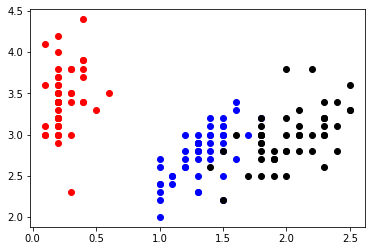

In [7]:
label0 = X[:50]
label1 = X[50:100]
label2 = X[100:150]

# plotting the results
plt.scatter(label0[:,3] , label0[:,1], color = 'red')

plt.scatter(label1[:,3] , label1[:,1], color = 'blue')

plt.scatter(label2[:,3] , label2[:,1], color = 'black')

# Step5: Distance Function

In [8]:
def eucledian(A,B):
    dist = np.sqrt(np.sum((A-B)**2))
    return dist

In [9]:
def corr(A, B):
    A = pd.Series(A)
    B = pd.Series(B)
    
    dis = 1-A.corr(B)
    return dis

In [10]:
def corr2(A, B):
    e1=((A-np.mean(A)).T/statistics.stdev(A))
    e2 = ((B-np.mean(B)).T/statistics.stdev(B))
    r=1/(A.shape[0]-1)*np.sum(e1*e2)
    dis = 1-r
    return dis

In [11]:
A = X_test[1,:]
B = X_train[1,:]

corr2(A, B)

0.3187597482162604

In [12]:
corr(A, B)

0.3187597482162604

# Step6: KNN

In [13]:
#Function to calculate KNN
def predict(x_train, y , x_test, k):
    pred_labels = []
     
    #Loop through the Datapoints to be classified
    for item in x_test: 
         
        #Array to store distances
        point_dist = []
         
        #Loop through each training Data
        for j in range(len(x_train)): 
            distances = eucledian(np.array(x_train[j,:]) , item) 
            #Calculating the distance
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
         
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(point_dist)[:k] 
         
        #Labels of the K datapoints from above
        labels = y[dist]
         
        #Majority voting
        lab = mode(labels) 
        lab = lab.mode[0]
        pred_labels.append(lab)
 
    return pred_labels

In [14]:
mode([1, 2, 3, 4, 4, 4, 4, 5, 6, 7, 7, 7, 8])[0]


np.argsort(np.array([99,1, 2,100, 3, 4, 4, 4, 4, 5, 6, 7, 7, 7, 8]))

array([ 1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,  0,  3])

In [15]:
y_pred = predict(X_train,y_train,X_test , 7)

In [16]:
accuracy_score(y_test, y_pred)

1.0

# Step6: Elbow Method for Choosing Reasonable K Values

In [17]:
error=[]
for i in range(1, 40):
    pred_i = predict(X_train,y_train,X_test , i)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

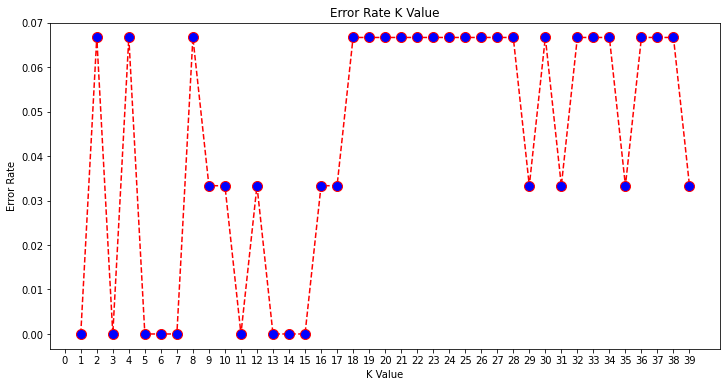

In [18]:
plt.figure(figsize=(12, 6))

plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)

plt.xticks(np.arange(0,40,1))

plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

# Step7: Final Model

In [19]:
y_pred = predict(X_train,y_train,X_test , 3)

accuracy_score(y_test, y_pred)

1.0